# PyCaret
Objetivo instalação do Pycaret e seguir um Pipeline de Machine Learning passando pelas principais funções para modelagem.

  
* **Carga dos dados:**  Como importar dados para utilizar o Pycaret.
* **Configuração do ambiente:**  Como configurar um experimento no Pycaret e iniciar a construção de modelos de classificação.
* **Criação de um modelo:**  Como criar um modelo, realizar cross validation e avaliar as métricas de classificação.
* **Otimização do modelo:**  Como automaticamente ajustar os hiperparametros de um modelo de classificação.
* **Análise de performance do modelo:**  Como analisar a performance do modelo utilizando gráficos.
* **Finalizar o modelo:** Como finalizar o melhor modelo e concluir o experimento.
* **Realizar predições:**  Como fazer predições para novos dados.
* **Salvar e Carregar o modelo:**  Como Salvar e Carregar o modelo para uso futuro.

## 1.1 Instalando o PyCaret

#### Instalando o PyCaret em um Jupyter Notebook Local.
`pip install pycaret`  <br />

#### Instalando o PyCaret utilizando o Google Colab ou Azure Notebooks.
`!pip install pycaret`


## 1.2 Pré-Requisitos
- Python 3.6 ou superior
- Conexão com a internet para carregar dados a partir do repositório do Pycaret.

## 1.3 No Google colab execute:
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

#### Instalando o Pycaret.

In [ ]:
pip install pycaret

#### Carregando o módulo de classificação e a função para buscar dados.

In [2]:
from pycaret.classification import *
from pycaret.datasets import get_data
import pandas as pd

# Conjunto de dados utilizado.

O dataset **Income** disponível no repositório do Pycaret.

Este conjunto de dados contém dados de pessoas e o objetivo é estimar se uma determinada pessoa recebe um salário anual maior que 50 mil ou não. Segue abaixo os atributos do conjunto de dados.

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Documentação do Pycaret para os conjuntos de dados.
A listagem de conjuntos de dados disponíveis no repositório do Pycaret __[aqui](https://pycaret.org/get-data/)__

#### Carregando os dados.

In [3]:
dataset = get_data('income')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### Verificando o objeto.

In [4]:
type(dataset)

pandas.core.frame.DataFrame

#### Verificando a forma dos dados.

In [5]:
dataset.shape

(32561, 14)

#### Verificando as informações dos atributos.

In [6]:
dataset.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
dataset.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
count,32561.000000,30725,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561.000000
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


#### Listando registros missing por atributo.

In [9]:
dataset.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

In [10]:
dataset.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

#### Separando os dados de validação.

##### Selecionando 95% dos dados dados de forma aleatória.

In [11]:
data = dataset.sample(frac=0.95 , random_state=42)

##### Atribuindo os 5% restante para o dataframe de validação.

In [12]:
data_validation = dataset.drop(data.index)

##### Excluindo os demais registros.

In [13]:
data.reset_index(inplace=True, drop=True)
data_validation.reset_index(inplace=True, drop=True)

##### Dados utilizados para modelagem e validação.

In [14]:
print('Dados para modelagem: ' + str(data.shape))
print('Dados reservados para a validação: ' + str(data_validation.shape))

Dados para modelagem: (30933, 14)
Dados reservados para a validação: (1628, 14)


# Configurando o ambiente com a função Setup.

Função Setup inicializa o ambiente no Pycaret e cria o pipeline de transformação e prepara os dados para modelagem e deploy.

In [15]:
exp_clf01 = setup(data = data, target = 'income >50K', session_id=123)

,Description,Value
0,Session id,123
1,Target,income >50K
2,Target type,Binary
3,Original data shape,"(30933, 14)"
4,Transformed data shape,"(30933, 64)"
5,Transformed train set shape,"(21653, 64)"
6,Transformed test set shape,"(9280, 64)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,8


Analisando os parametros do experimento criado.

- **session_id :**  Um número aleatório que é passado a todas as funções para garantir a reproducibilidade. Se não especificar o número é passado um padrão.<br/>
<br/>
- **Target Type :**  Binary ou Multiclass. O tipo do atributo alvo é automaticamente detectado.<br/>
<br/>
- **Label Encoded :**  Se o atributo alvo é categorico os valores são codificados utilizando o Label Encoded e é exibido esse mapeamento.<br/>
<br/>
- **Original Data :**  Exibe o shape do dataset original. <br/>
<br/>
- **Missing Values :**  Indica se existe Registros Missing. 
<br/>
<br/>
- **Numeric Features :**  O númerio de features inferidas como numéric. <br/>
<br/>
- **Categorical Features :**  O númerio de features inferidas como categoricas. <br/>
<br/>
- **Transformed Train Set :**  Exibe o shape do conjunto de treino transformado. Detalhe para o número de features.<br/>
<br/>
- **Transformed Test Set :**  Exibe o shape do conjunto de teste transformado. A divisão de quantidade de dados para treino e teste é 70/30 por padrão.<br/>

##### Verificando o objeto criado.

In [16]:
exp_clf01 

# Comparando modelos

Esta função treina e compara a performance de todos os modelos para a determinada tarefa escolhida (Classificação, Regressão, Clustering etc) utilizando cross validation e retorna as métricas para avaliação e o tempo de treinamento.

In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8708,0.9264,0.6532,0.7751,0.7089,0.6267,0.6305,0.5720
xgboost,Extreme Gradient Boosting,0.8694,0.9253,0.6566,0.7678,0.7077,0.6243,0.6276,1.6390
gbc,Gradient Boosting Classifier,0.8643,0.9192,0.6009,0.7852,0.6806,0.5964,0.6051,1.2440
ada,Ada Boost Classifier,0.8590,0.9129,0.6070,0.7597,0.6747,0.5861,0.5922,0.6900
lr,Logistic Regression,0.8486,0.9014,0.5932,0.7278,0.6534,0.5578,0.5627,4.1070
rf,Random Forest Classifier,0.8455,0.8902,0.6154,0.7058,0.6573,0.5582,0.5605,1.4230
knn,K Neighbors Classifier,0.8445,0.8747,0.6377,0.6922,0.6635,0.5627,0.5637,0.5380
lda,Linear Discriminant Analysis,0.8390,0.8906,0.5566,0.7123,0.6247,0.5242,0.5308,0.3770
ridge,Ridge Classifier,0.8381,0.0000,0.4992,0.7446,0.5975,0.5011,0.5169,0.3840
et,Extra Trees Classifier,0.8261,0.8467,0.5834,0.6570,0.6178,0.5058,0.5074,3.2680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


# Criando o Modelo

Esta função treina o modelo especificado utilizando cross validation e retorna suas métricas.

### Light Gradient Boosting Machine

In [19]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8818,0.9305,0.6820,0.7982,0.7355,0.6600,0.6634
1,0.8772,0.9322,0.6552,0.7991,0.7200,0.6423,0.6475
2,0.8730,0.9273,0.6590,0.7800,0.7144,0.6335,0.6373
3,0.8836,0.9348,0.6852,0.8022,0.7391,0.6648,0.6682
4,0.8776,0.9246,0.6852,0.7795,0.7293,0.6507,0.6529
5,0.8688,0.9298,0.6411,0.7749,0.7017,0.6186,0.6231
6,0.8619,0.9130,0.6372,0.7511,0.6895,0.6015,0.6048
7,0.8628,0.9263,0.6418,0.7528,0.6929,0.6053,0.6085
8,0.8633,0.9238,0.6245,0.7653,0.6878,0.6014,0.6065


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


# Otimiza o Modelo

Esta função automaticamente otimiza os hiperparametros do modelo usando Random Grid Search em um espaço de busca predefinido.

In [21]:
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8740,0.9280,0.6667,0.7785,0.7183,0.6377,0.6409
1,0.8763,0.9295,0.6513,0.7981,0.7173,0.6391,0.6445
2,0.8758,0.9252,0.6609,0.7895,0.7195,0.6406,0.6447
3,0.8758,0.9320,0.6775,0.7775,0.7241,0.6444,0.6470
4,0.8776,0.9256,0.6814,0.7819,0.7282,0.6497,0.6523
5,0.8707,0.9265,0.6430,0.7809,0.7053,0.6234,0.6282
6,0.8637,0.9120,0.6315,0.7616,0.6905,0.6041,0.6084
7,0.8674,0.9259,0.6571,0.7605,0.7050,0.6201,0.6229
8,0.8614,0.9214,0.6207,0.7606,0.6835,0.5960,0.6010


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Verificando o objeto criado

In [22]:
print(tuned_lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


# Exibindo graficamente a performance do modelo

Com esta função podemos analisar a performance do modelo através de gráficos.

### Feature Importance Plot

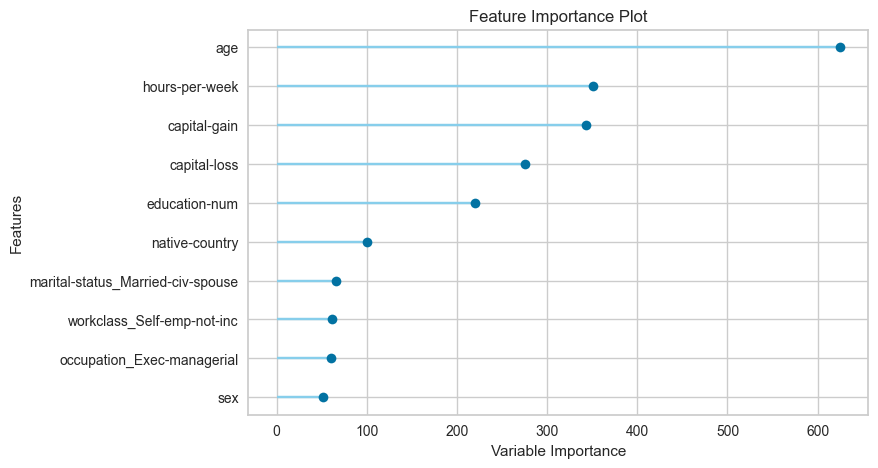

In [23]:
plot_model(tuned_lgbm, plot='feature')

### Matriz de confusão

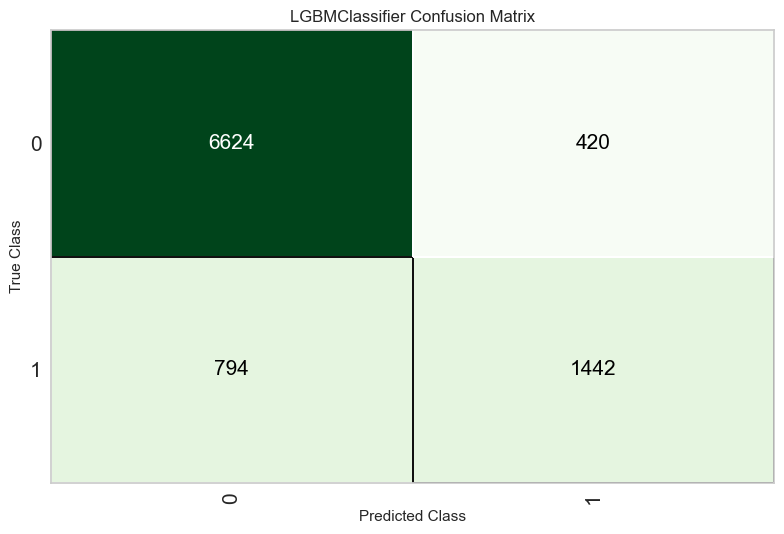

In [24]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

A função evaluate_model exibe uma interface o usuário selecionar os gráficos disponíveis para um determinado modelo.

NOTE: This function only works in Jupyter Notebook or an equivalent environment.

In [25]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predict utilizando a amostra de teste.

Esta função realiza a predição utilizando o modelo especificado utilizando a amostra separada de teste.

In [26]:
predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8692,0.9264,0.6449,0.7744,0.7038,0.6207,0.6250


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,prediction_label,prediction_score
11658,33,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0,0.8013
12330,30,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0,0,0.9677
19717,46,Private,Some-college,10,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,20,United-States,0,0,0.8720
24985,23,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,60,United-States,0,0,0.9871
20152,19,NaN,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,50,United-States,0,0,0.9989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,57,Local-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0,1,0.7621
8454,60,Private,Some-college,10,Divorced,Sales,Not-in-family,White,Female,0,0,48,United-States,0,0,0.8862
10959,33,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,3411,0,40,United-States,0,0,0.9754
5349,27,Private,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0,0,0.9949


# Predict utilizando os dados de validação.

In [27]:
validation_predictions = predict_model(tuned_lgbm, data=data_validation)
validation_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8851,0.9327,0.6761,0.8117,0.7377,0.6650,0.6695


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,prediction_label,prediction_score
0,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,1,0.9841
1,43,Private,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1,1,0.5689
2,67,NaN,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,0,0,0.9659
3,49,Local-gov,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,1,1,0.5065
4,20,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,1719,28,United-States,0,0,0.9998


In [33]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(validation_predictions['income >50K'], validation_predictions['prediction_label'])

0.8851351351351351

# Finalize Modelo

Esta função treina o algoritmo e cria o modelo utilizando todo o conjunto de dados.

In [28]:
final_lgbm = finalize_model(tuned_lgbm)

In [29]:
print(final_lgbm)

Pipeline(memory=FastMemory(location=C:\Users\felip\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'education-num',
                                             'capital-gain', 'capital-loss',
                                             'hours-per-week'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importan

# Save model

Esta função realiza a persistencia do modelo em disco.

In [30]:
save_model(final_lgbm,'Final LGBM Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\felip\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'education-num',
                                              'capital-gain', 'capital-loss',
                                              'hours-per-week'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree